# Loan Application Status Prediction

Problem Statement: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.shape # total 614 rows and 13 columns

(614, 13)

In [9]:
df.info()# loan_status is target variable is a object so classification be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Analysis

In [20]:
df.nunique()#unique values present in the each value

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [21]:
# checking valuea counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print('---------------')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
---------------
Male      502
Female    112
Name: Gender, dtype: int64
---------------
Yes    401
No     213
Name: Married, dtype: int64
---------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
---------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
---------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
---------------
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
---------------
146.412162 

# Exploratory Data Analysis

<AxesSubplot:>

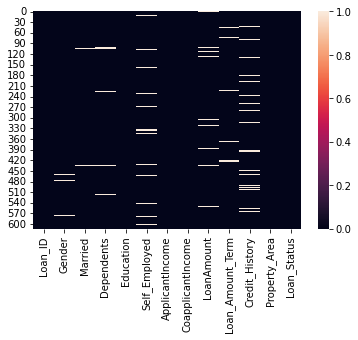

In [11]:
sns.heatmap(df.isnull())

It’s clearly visible that there are too many null values present in the dataset.

In [14]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype == "object":
        df[collist[i]].fillna(df[collist[i]].mode()[0], inplace=True)
        
        
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype != "object":
        df[collist[i]].fillna(df[collist[i]].mean(), inplace=True)        

<AxesSubplot:>

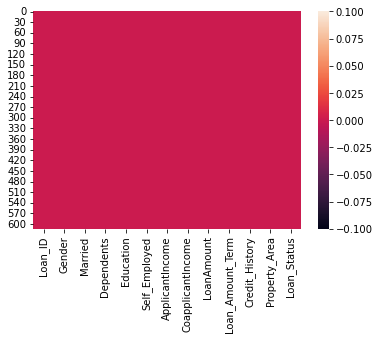

In [16]:
# checking null values
sns.heatmap(df.isnull())

In [ ]:
Abvoe map shows that all null values removed

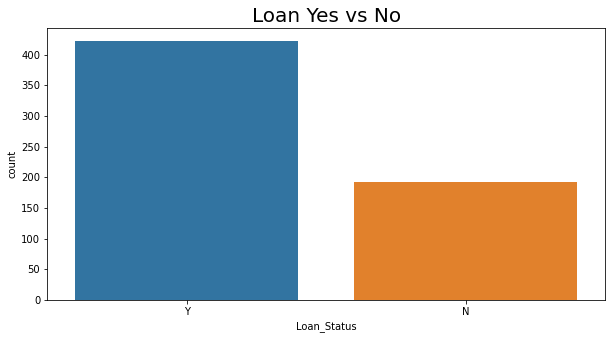

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(x="Loan_Status",data=df)
plt.title("Loan Yes vs No", fontsize = 20)

plt.show()

here we can see less than 50% application loan not approved

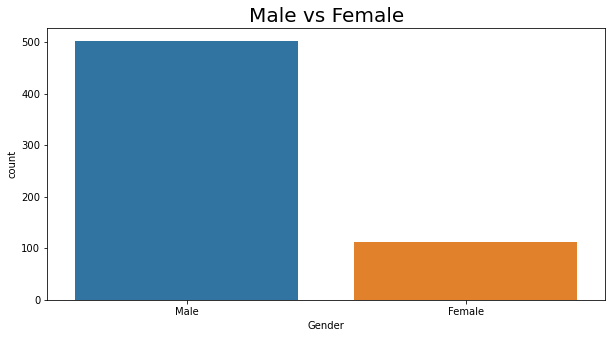

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(x="Gender",data=df)
plt.title("Male vs Female", fontsize = 20)

plt.show()

Male applicants are more than female

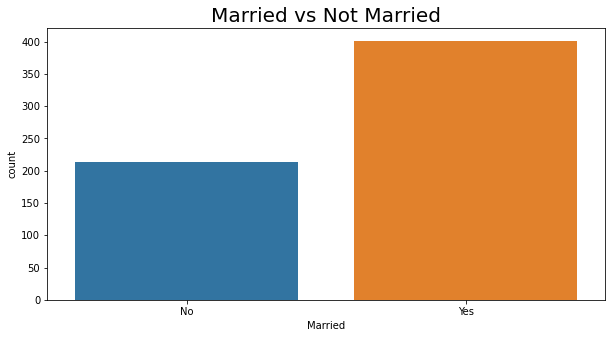

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x="Married",data=df)
plt.title("Married vs Not Married", fontsize = 20)

plt.show()

married applicants are more

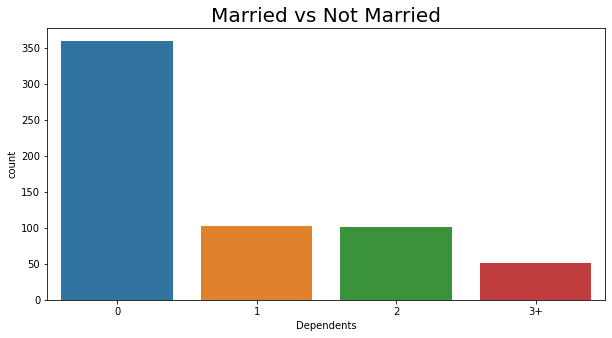

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x="Dependents",data=df)
plt.title("Married vs Not Married", fontsize = 20)

plt.show()

No dependents applied loan most, bachulors

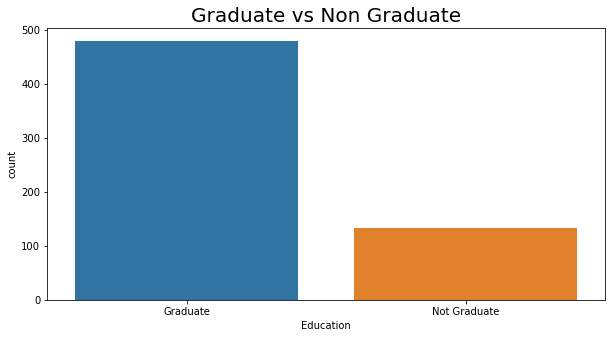

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x="Education",data=df)
plt.title("Graduate vs Non Graduate", fontsize = 20)

plt.show()

In [26]:
# Graduate people applied for loan most

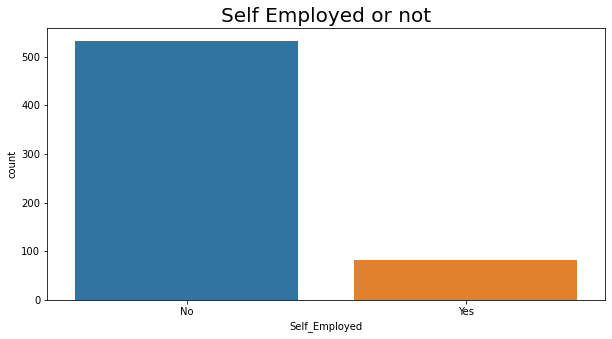

In [27]:
plt.figure(figsize = (10,5))
sns.countplot(x="Self_Employed",data=df)
plt.title("Self Employed or not", fontsize = 20) 

plt.show()

Those persons who are not self employed apply fpr loan most

Text(0.5, 1.0, 'Property Area Type')

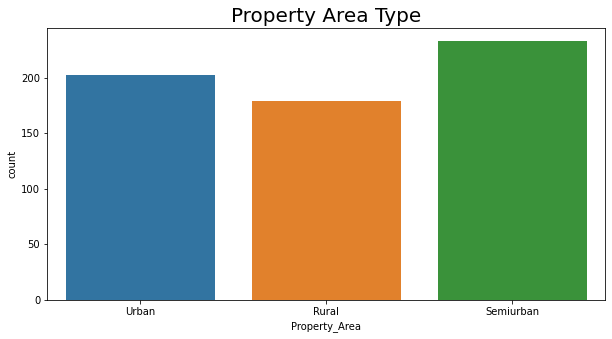

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(x="Property_Area",data=df)
plt.title("Property Area Type", fontsize = 20) 


In [ ]:
Semiurban applied for loan most

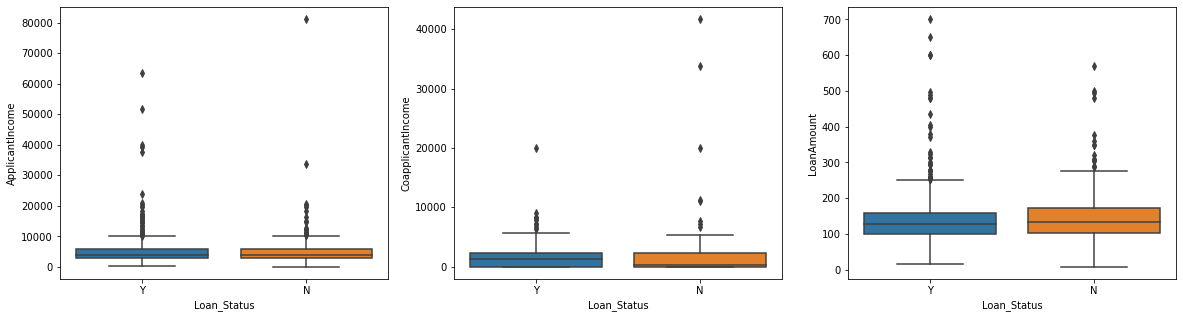

In [37]:
Label_list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(20,5)) #size of plot
for i,cat_col in enumerate(label_list):
      sns.boxplot(y=cat_col,data=df ,x='Loan_Status',ax=axes[i])
plt.subplots_adjust(hspace=1) #plotting the graph

Applicant income, co-applicant income and loan amount for all 3 things amount doen't matter

In [41]:
#Dropping Loan _id
df.drop('Loan_ID',axis=1,inplace=True)

# Pre-Processing pipeline

Removing Skewness

In [42]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

Skewness of these columns are too high,lets reduce skewness using powertransformer

In [43]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if df(i).dtype != "object":
        if((len(pd.unique(df[i]))) > 3):
            if abs(df.loc[:,i].skew()) > 0.55:
                df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))
                                                                    

TypeError: 'DataFrame' object is not callable

In [44]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if df[i].dtype != "object":
        if ((len(pd.unique(df[i]))) > 3):
            if abs(df.loc[:,i].skew())>0.55:
                   df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

# Label Encoding

Lets perform label encoding to convert object type columns into numeric type

In [53]:
label_list = list(df.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in Label_list:
    df[i]  = le.fit_transform(df[i])

In [54]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,100,0.185905,1.0,2,1
1,1,1,1,0,0,306,60,81,0.185905,1.0,0,0
2,1,1,0,0,1,139,0,26,0.185905,1.0,2,1
3,1,1,0,1,0,90,160,73,0.185905,1.0,2,1
4,1,0,0,0,0,381,0,94,0.185905,1.0,2,1


Now all type of columns are numeric

# Removing Outliers

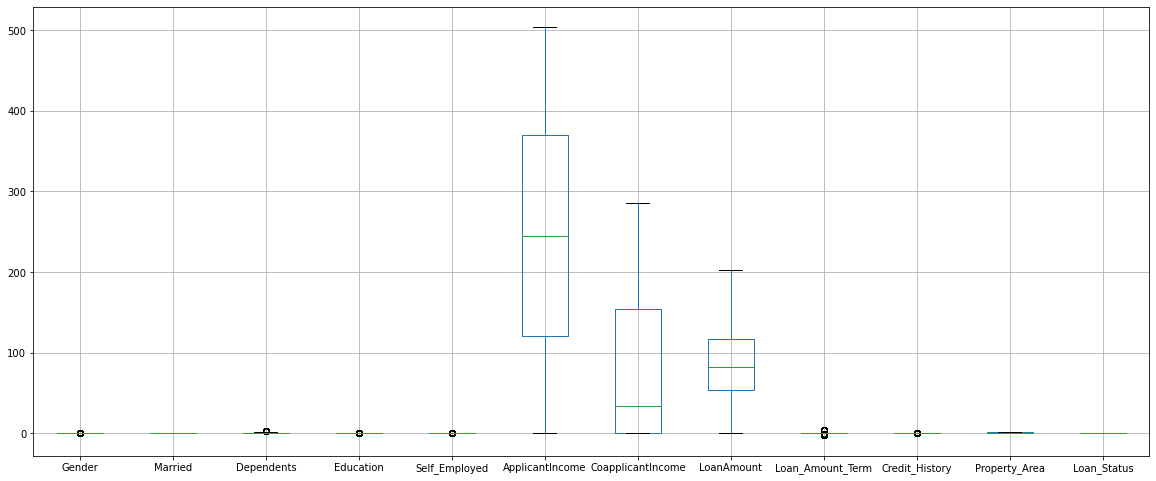

In [57]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.10)
plt.show()

Outliers present in dataset.lets remove it

In [58]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 75, 109, 130, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500,
       516, 573], dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [59]:
# removing the outliers
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(614, 12)
(599, 12)


In [60]:
#checking for how much data lost
loss_percent=(614-599)/614*100
print(loss_percent)

2.44299674267101


loss of data is only 2.5% which is not bad

# Building Machine Learning Models

In [61]:
X = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

# scaling

Scaling is required beacause there is too much difference in minimum and maximum value of columns

In [64]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
scale_X =scaler.fit_transform(X)
scaled_X =pd.DataFrame(scale_X,index=X.index, columns=X.columns)
X=scaled_X
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.746032,0.000000,0.492611,0.421646,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.607143,0.209790,0.399015,0.421646,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.275794,0.000000,0.128079,0.421646,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.178571,0.559441,0.359606,0.421646,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.755952,0.000000,0.463054,0.421646,1.0,1.0


# Finding Best Random State

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings

warnings.filterwarnings('ignore')
maxAccu =0
maxRs = 0

for i in range(1400,1450):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    predrf = LR.predict(X_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    print("Best accuracy is",maxAccu,"on Random_state",maxRS) 
    

Best accuracy is 0.8432432432432433 on Random_state 1400
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.8594594594594595 on Random_state 1401
Best accuracy is 0.859459459459

In [ ]:
max accuracy is 0.88 on random state 1424

# Train Test Split

Splitting train and test data 70% data will be train and 30% data will be test

# Finding Best Algorithm

#importing all the required to find best algorithm

In [70]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    pred=m.predict(X_test)
    print("_________________________________________________________________________________")
    
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,X,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,pred)-score.mean())
    

_________________________________________________________________________________
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8540540540540541
[[ 25  26]
 [  1 133]]
              precision    recall  f1-score   support

           0       0.96      0.49      0.65        51
           1       0.84      0.99      0.91       134

    accuracy                           0.85       185
   macro avg       0.90      0.74      0.78       185
weighted avg       0.87      0.85      0.84       185

[0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
0.8078368652538984
Difference between Accuracy score and cross validation score is - 0.046217188800155684
_________________________________________________________________________________
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> KNeighborsClassifier()
0.8162162162162162
[[ 24  27]
 [  7 127]]
              precis

Random forest classifier have highest accuracy more than 80% and the difference between cross validation score and accuracy score it less. so random forest classifier will be used here to learn model

# Hyper Parameter Tuning

Performing hyper parameter tuning to get good and more accurate result from the model

In [71]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],"max_features":[3,5,7,9],"min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(),parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'min_samples_leaf': 6, 'max_features': 3, 'max_depth': 9}

In [72]:
clf_pred=clf.best_estimator_.predict(X_test)# predicting result based on test based

accuracy_score(y_test,clf_pred)

0.8540540540540541

model learnt almost 85%

In [73]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8540540540540541
[[ 25  26]
 [  1 133]]
              precision    recall  f1-score   support

           0       0.96      0.49      0.65        51
           1       0.84      0.99      0.91       134

    accuracy                           0.85       185
   macro avg       0.90      0.74      0.78       185
weighted avg       0.87      0.85      0.84       185



# AUC ROC curve

plotting AUC ROC curve to see the false positive rate and true positive rate

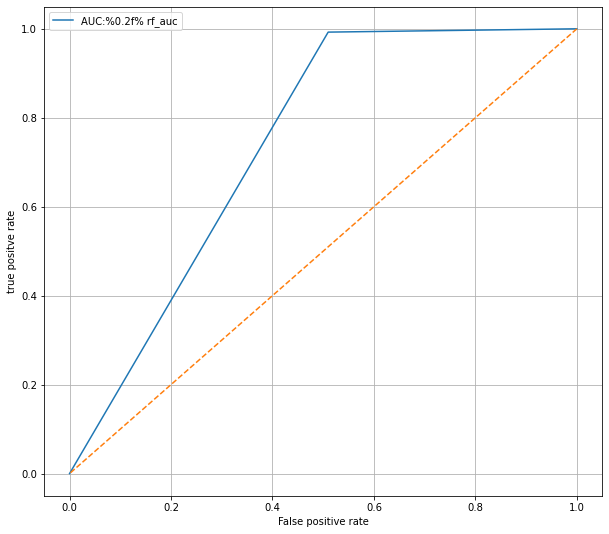

In [75]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds = roc_curve(y_test,clf_pred)# caliculating fpr ,tpr
rf_auc = auc(fpr,tpr)
plt.figure(figsize = (10,9))
plt.plot(fpr,tpr,label='AUC:%0.2f% rf_auc')
plt.plot([1,0],[1,0],linestyle = '--')
plt.legend(loc=0)
plt.xlabel('False positive rate')
plt.ylabel('true positve rate')
plt.grid()# adding grid lines

In [ ]:
Saving the model

In [77]:
import joblib
joblib.dump(clf.best_estimator_,"Loan.obj")
SVR_from_joblib=joblib.load("Loan.obj")
Predicted = SVR_from_joblib.predict(X_test)
Predicted

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1])

In this case study, a Machine Learning model is developed to predict, whether loan should be approved or not. Here several features were mined from the dataset and combined together with the help of Machine Leaning, to do the loan application status prediction. With the help of the above techniques, proposed model is able to predict the status of the load with an accuracy score of 87%. However, there is still ways to do improvement in this model.
In the future, our model can be predict the status of the loan more accurately.